# 1. Implemente o Método da Bisecção e o Método de Newton para resolver $f(x) = 0$, de modo que $f$ seja um dos parâmetros de entrada.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.axes._axes import _log as matplotlib_axes_logger

In [2]:
def f(x):
  return x**3 + 4*(x)**2-10

In [3]:
def fLinha(x):
  return 3*(x)**2 + 8*x

In [4]:
def bisseccao(f, a, b, TOL, N0, prints=True):
  i = 0
  FA = f(a)
  p = []

  while i != N0:
    p.append(a + (b-a)/2) # ponto medio
    FP = f(p[i])
    if prints:
      print(f"Iteração {i}: {p[i]}.")

    # CONDIÇÃO DE PARADA
    if FP == 0:
      if prints:
        print("Raiz encontrada!")
      return p

    elif (b-a)/2 < TOL:
      if prints:
        print("Raiz encontrada por limite de tolerância!")
      return p

    # PRÓXIMA ITERAÇÃO
    if FA*FP > 0:
      a = p[i]
      FA = FP
    else: b = p[i]

    i+=1
  
  if prints:
    print(f"Falha no método da Bisecção após {N0} iterações.")
  return p

In [5]:
def newton(f, fLinha, p0, TOL, N0, prints=True):
  i = 1
  p = []
  p.append(p0)

  while i != N0:

    if fLinha(p0) == 0:
      p0 += 0.01

    p.append(p0 - f(p0)/fLinha(p0))
      
    if prints:
      print(f"Iteração {i}: {p[i]}.")

    if f(p[i]) == 0:
      if prints:
        print("Raiz encontrada!")
      return p


    if abs(p[i]-p0) < TOL:
      if prints:
        print("Raiz encontrada por limite de tolerância!")
      return p

    p0 = p[i]
    i += 1

  if prints:
    print(f"Falha no método da Bisecção após {N0} iterações.")

  return p

In [6]:
p = bisseccao(f, 0, 4, 0.0001, 100)

Iteração 0: 2.0.
Iteração 1: 1.0.
Iteração 2: 1.5.
Iteração 3: 1.25.
Iteração 4: 1.375.
Iteração 5: 1.3125.
Iteração 6: 1.34375.
Iteração 7: 1.359375.
Iteração 8: 1.3671875.
Iteração 9: 1.36328125.
Iteração 10: 1.365234375.
Iteração 11: 1.3642578125.
Iteração 12: 1.36474609375.
Iteração 13: 1.364990234375.
Iteração 14: 1.3651123046875.
Iteração 15: 1.36517333984375.
Raiz encontrada por limite de tolerância!


In [7]:
p1 = newton(f, fLinha, 2, 0.00001, 100)

Iteração 1: 1.5.
Iteração 2: 1.3733333333333333.
Iteração 3: 1.3652620148746266.
Iteração 4: 1.3652300139161466.
Iteração 5: 1.3652300134140969.
Raiz encontrada!


# 2. Implemente uma função que receba $f, a, b$ e $\Delta$ e plote um gráfico de $y=f(x)$ restrito ao intervalo $[a,b]$, mostrando uniformemenre o domínio entre $a$ e $b$ com passo $\Delta$, e usando segmentos de reta.

In [8]:
def plotar_f(f, a, b, delta):
  x = np.arange(a, b + delta, delta)

  plt.figure(figsize=(10,8))
  plt.title(f"Função com intervalo de {delta} unidades", fontsize=20)
  f2 = np.vectorize(f)
  plt.plot(x, f2(x))
  plt.xlim([a, b])
  plt.axhline(y=0, color='black')
  plt.axvline(x=0, color='black')
  plt.grid()
  plt.show()

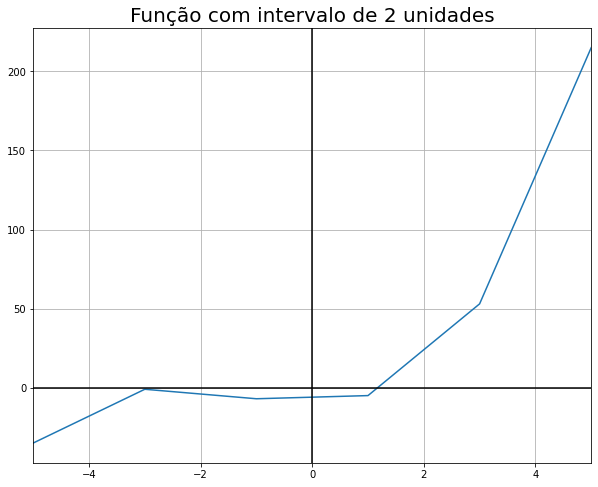

In [9]:
plotar_f(f, -5, 5, delta = 2)

# 3. Implemente uma função que receba $f$ e uma tolerância (TOL), e retorne o tempo de processamento em milissegundos de cada um dos métodos e o array com a sequência $p_n$ de aproximações da raiz.

In [10]:
import time

In [11]:
def t(f, TOL, N0, a=10, b=10):

  ib = time.time()
  pnb = bisseccao(f, a, b, TOL, N0, prints=False)
  fb = time.time()

  inn = time.time()
  pnn = newton(f, fLinha, (a+b)/2, TOL, N0, prints=False)
  fimn = time.time()

  print("Tempo no método da Bissecção:", fb-ib, "segundos")
  print("Tempo no método de Newton:", fimn-inn, "segundos")

  if fb-ib > fimn-inn:
    print("Melhor tempo: Bissecção.")
  elif fb-ib < fimn-inn:
    print("Melhor tempo: Newton.")
  else:
    print("Tempos iguais.")


In [12]:
t(f, 0.00001, 200)

Tempo no método da Bissecção: 1.7642974853515625e-05 segundos
Tempo no método de Newton: 3.409385681152344e-05 segundos
Melhor tempo: Newton.


# 4. Combinando os resultados das questões 3 e 4, implemente um algoritmo que plote o gráfico de $y=f(x)$ junto com a sequência de pontos $(p_n,f(p_n))$ para cada um dos métodos. O gráfico deve ser uma curva poligonal (i.e. segmentos de retas conectados).

In [13]:
from operator import index
def plotar_pn(f, a, b, TOL, N0, ffLinha):

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
  fig.suptitle('Comparação entre métodos', fontsize=20)
  f2 = np.vectorize(f)

  # BISSECCÃO
  pn_bisseccao = np.asarray(bisseccao(f,a,b,TOL,N0,prints=False))
  fpn_bisseccao = f2(pn_bisseccao)

  cor_bisseccao = []
  n_bisseccao = len(pn_bisseccao)
  for i in range(n_bisseccao):
    cor_bisseccao.append( [(n_bisseccao-i)/n_bisseccao, 0, (i)/n_bisseccao] )

  
  x_bisseccao = np.arange(a, b, 0.01)
  ax1.set_title('Método da Bissecção')
  ax1.plot(x_bisseccao, f2(x_bisseccao))
  ax1.axhline(y=0, color='black')
  ax1.axvline(x=0, color='black')

  for i in range(len(pn_bisseccao)):
    ax1.scatter(pn_bisseccao[i], fpn_bisseccao[i], c = cor_bisseccao[i],s=15**2)


  # MÉTODO DE NEWTON
  p0 = (a + b)/2
  pn_newton = np.asarray(newton(f,ffLinha,p0,TOL,N0,prints=False))
  fpn_newton = f2(pn_newton)

  cor_newton = []
  n_newton = len(pn_newton)
  for i in range(n_newton):
    cor_newton.append( [(n_newton-i)/n_newton, 0, (i)/n_newton] )

  
  x_newton = np.arange(a, b, 0.01)
  ax2.set_title('Método de Newton')
  ax2.plot(x_newton, f2(x_newton))
  ax2.axhline(y=0, color='black')
  ax2.axvline(x=0, color='black')

  for i in range(len(pn_newton)):
    ax2.scatter(pn_newton[i], fpn_newton[i], c = cor_newton[i],s=15**2)
  
  ax1.grid()
  ax2.grid()
  plt.show()

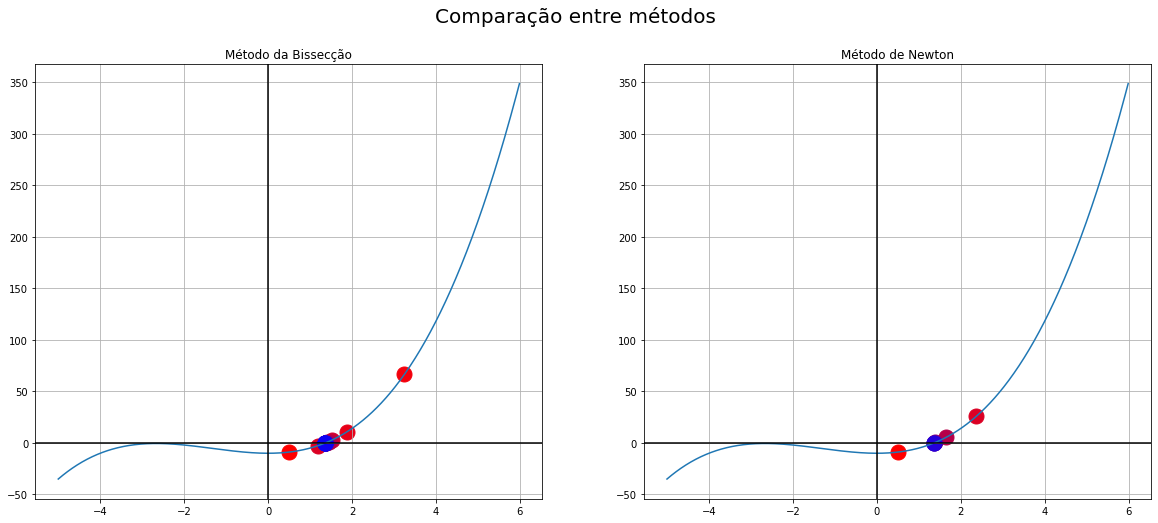

In [14]:
matplotlib_axes_logger.setLevel('ERROR')
plotar_pn(f, -5, 6, 0.00001, 100,fLinha)

# 5. Implemente uma função que plote os gráficos $y=t(x)$ de cada um dos métodos (bisecção e newton), onde $x$ é uma tolerância (TOL) dada de entrada a cada algoritmo, e $t(x)$ é o tempo de processamento do algoritmo, quando a tolerância $x$ é dada de entrada.

> OBS: os gráficos devem ser representados por curvas poligonais em uma única figura, com o mesmo sistema de coordenadas.



In [15]:
def tolerancia_por_tempo(tolerancia, tolerancia_final, f, flinha):
  tx_biseccao = []
  tx_newton = []
  x = []

  while tolerancia <= tolerancia_final:
    x.append(tolerancia)

    ib = time.time()
    pnb = bisseccao(f, 0, 4, tolerancia, 100, prints=False)
    fb = time.time()
    tx_biseccao.append(fb-ib)

    inn = time.time()
    pnn = newton(f, fLinha, 2, tolerancia, 100, prints=False)
    fimn = time.time()
    tx_newton.append(fimn-inn)

    tolerancia += 0.001

  return x, tx_biseccao, tx_newton


In [16]:
x, tx_biseccao, tx_newton = tolerancia_por_tempo(0.001, 0.05, f, fLinha)

In [17]:
def plot_tol_tempo(x, tx_biseccao, tx_newton):
  fig = plt.figure(figsize=(20,8))
  ax = fig.add_subplot(1, 1, 1)
  
  ax.set_title('Tempo de execução')
  ax.plot(x, tx_biseccao, label="Método da Bissecção")
  ax.plot(x, tx_newton, label="Método de Newton")
  ax.legend(loc="upper right")
  ax.set_xlabel('Tolerância')
  ax.set_ylabel('Tempo em milisegundos')
  ax.set_xlim(0.001, 0.05)

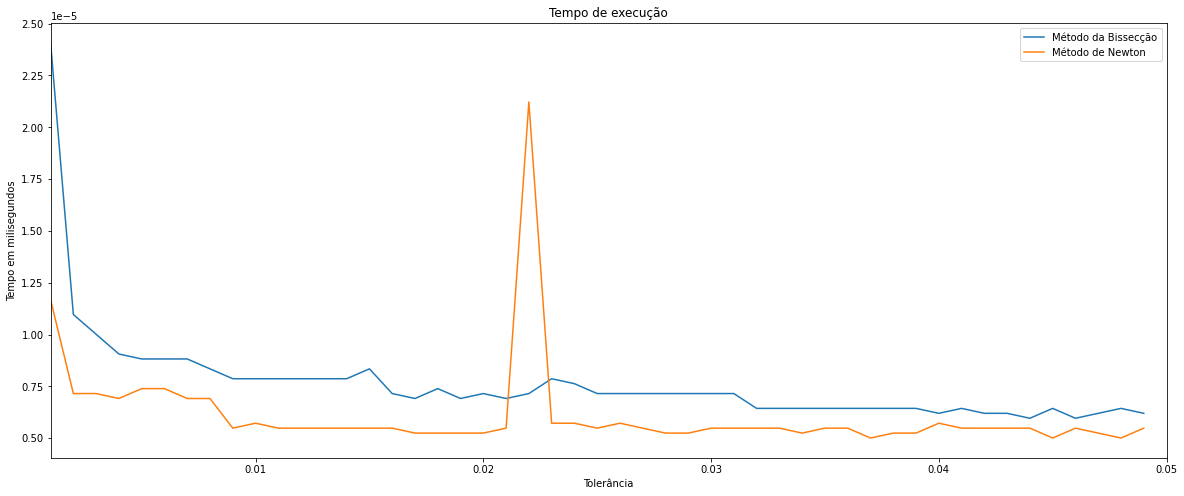

In [18]:
plot_tol_tempo(x, tx_biseccao, tx_newton)

# 6. Gere resultados de todas as questões acima para as seguintes equações, variando a tolerância. Gerar resultado significa resolver a equação (com cada método), plotar os gráficos da questão 4 (que dependem das questões 2 e 3), e os gráficos da questão 6.

## a) $e^x-2=cos(e^x-2)$, [0.5,1.5]

In [19]:
a, b = 0.5, 1.5
p0 = (a + b)/2
delta = (b - a)/10

In [20]:
def fa(x):
  return (math.e**x)-2-math.cos((math.e**x)-2)

In [21]:
def faLinha(x):
  return (math.e**x) * (math.sin((math.e**x)-2) + 1)

In [22]:
p = bisseccao(fa, a, b, 0.0001, 100)

Iteração 0: 1.0.
Iteração 1: 1.25.
Iteração 2: 1.125.
Iteração 3: 1.0625.
Iteração 4: 1.03125.
Iteração 5: 1.015625.
Iteração 6: 1.0078125.
Iteração 7: 1.00390625.
Iteração 8: 1.005859375.
Iteração 9: 1.0068359375.
Iteração 10: 1.00732421875.
Iteração 11: 1.007568359375.
Iteração 12: 1.0076904296875.
Iteração 13: 1.00762939453125.
Raiz encontrada por limite de tolerância!


In [23]:
p1 = newton(fa, faLinha, p0, 0.00001, 100)

Iteração 1: 1.007689036256543.
Iteração 2: 1.0076239763346948.
Iteração 3: 1.0076239716581368.
Raiz encontrada por limite de tolerância!


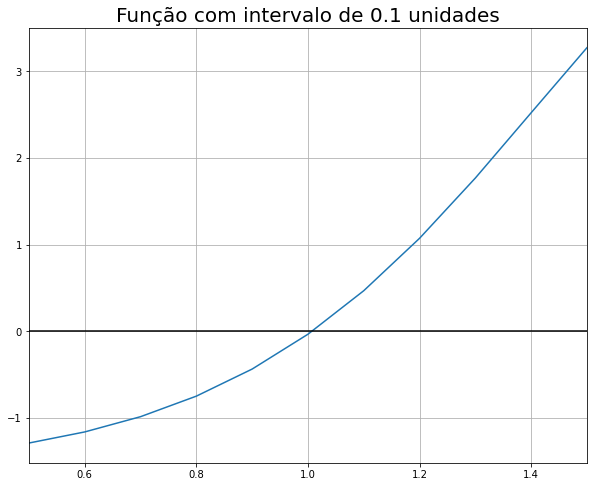

In [24]:
plotar_f(fa, a, b, delta)

In [25]:
t(fa, 0.00001, 200, a, b)

Tempo no método da Bissecção: 4.9591064453125e-05 segundos
Tempo no método de Newton: 4.553794860839844e-05 segundos
Melhor tempo: Bissecção.


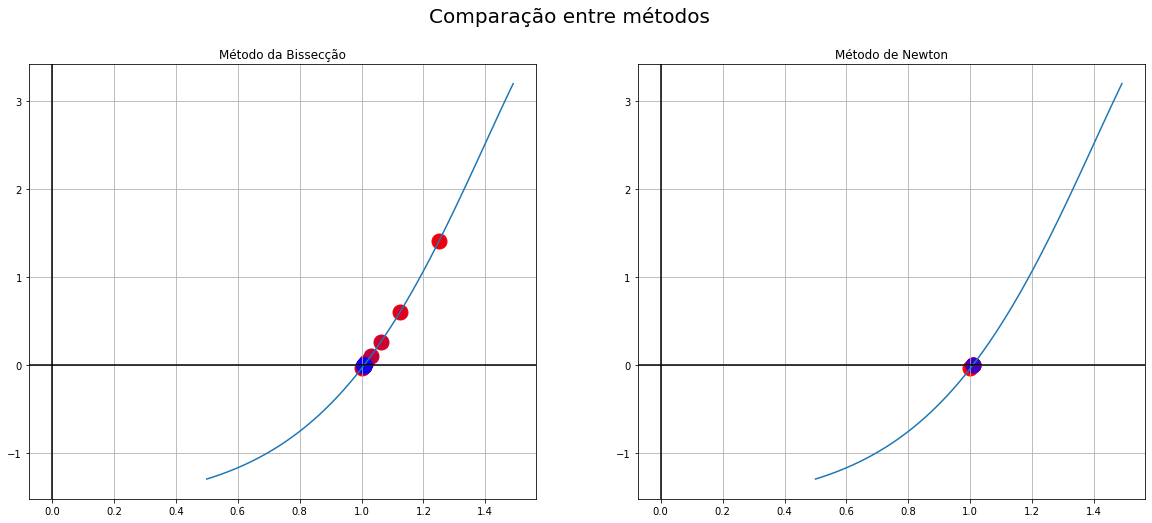

In [26]:
plotar_pn(fa, a, b, 0.00001, 100, faLinha)

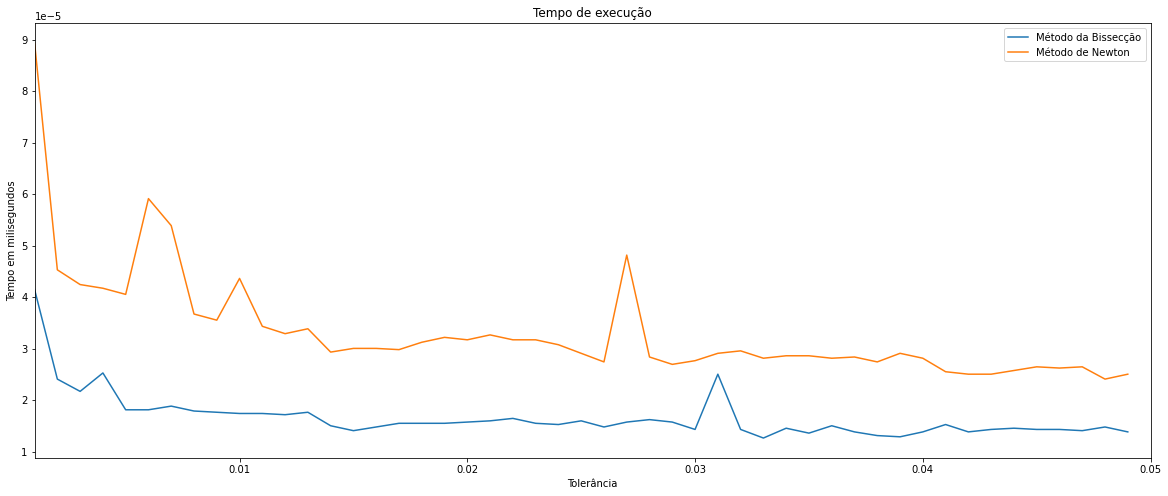

In [27]:
x, tx_biseccao, tx_newton = tolerancia_por_tempo(0.001, 0.05, fa, faLinha)
plot_tol_tempo(x, tx_biseccao, tx_newton)

## b) $x^2-4x+4-ln(x)=0$, [1,2]

In [28]:
a, b = 1, 2
p0 = (a + b)/2
delta = (b - a)/10

In [29]:
def fb(x):
  if not x: x=1
  return (x**2)-(4*x)+4-math.log(abs(x))

In [30]:
def fbLinha(x):
  return (2*x)-(4)-(1/x)

In [31]:
p = bisseccao(fb, a, b, 0.0002, 100)

Iteração 0: 1.5.
Iteração 1: 1.25.
Iteração 2: 1.375.
Iteração 3: 1.4375.
Iteração 4: 1.40625.
Iteração 5: 1.421875.
Iteração 6: 1.4140625.
Iteração 7: 1.41015625.
Iteração 8: 1.412109375.
Iteração 9: 1.4130859375.
Iteração 10: 1.41259765625.
Iteração 11: 1.412353515625.
Iteração 12: 1.4124755859375.
Raiz encontrada por limite de tolerância!


In [32]:
p1 = newton(fb, fbLinha, p0, 0.00002, 100)

Iteração 1: 1.4067209351351013.
Iteração 2: 1.4123699572511934.
Iteração 3: 1.4123911717250053.
Iteração 4: 1.4123911720238844.
Raiz encontrada por limite de tolerância!


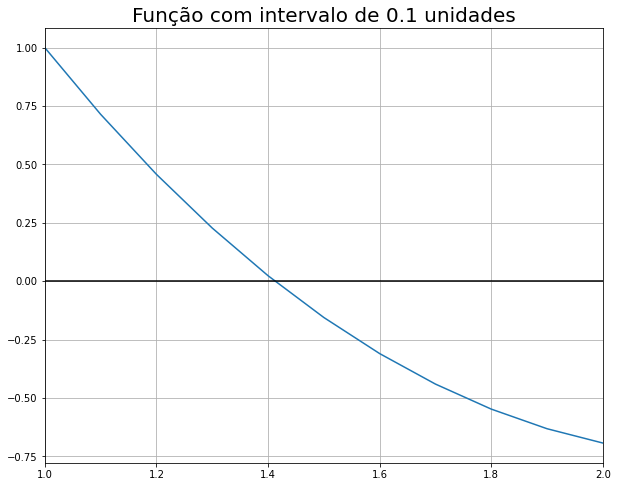

In [33]:
plotar_f(fb, a, b, delta)

In [34]:
t(fb, 0.00001, 200, a, b)

Tempo no método da Bissecção: 5.435943603515625e-05 segundos
Tempo no método de Newton: 0.0007567405700683594 segundos
Melhor tempo: Newton.


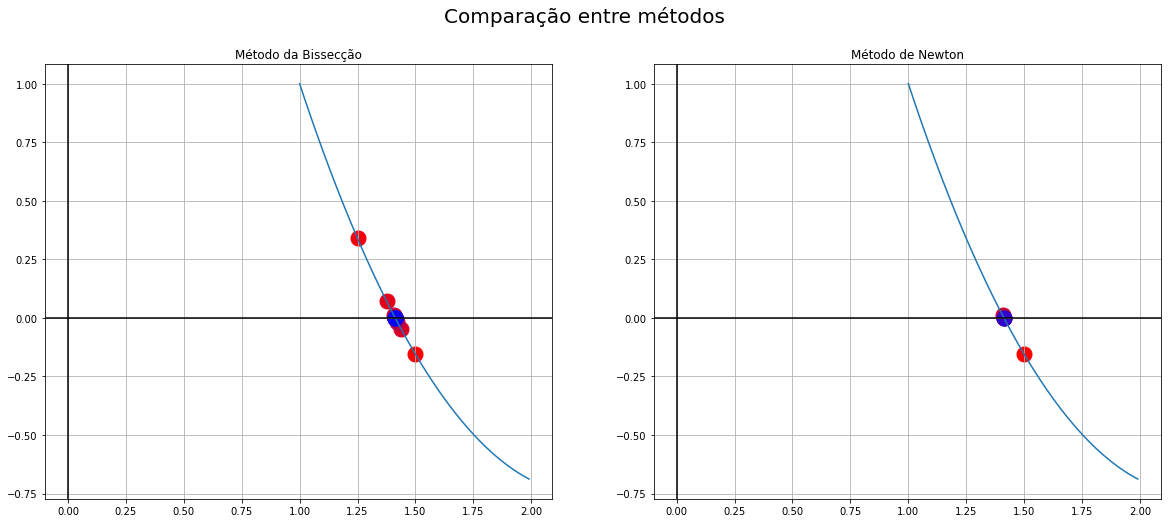

In [35]:
plotar_pn(fb, a, b, 0.000002, 100, fbLinha)

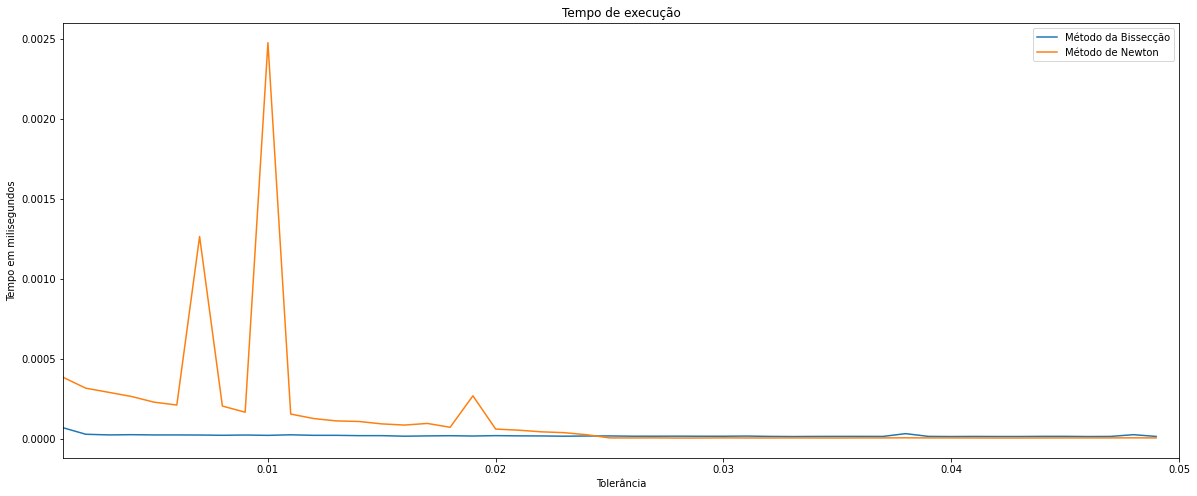

In [36]:
x, tx_biseccao, tx_newton = tolerancia_por_tempo(0.001, 0.05, fb, fbLinha)
plot_tol_tempo(x, tx_biseccao, tx_newton)

## c) $2x*cos(2x)-(x+1)^2=0$, [-3,-2]

In [37]:
a, b = -3, -2
p0 = (a + b)/2
delta = (b - a)/10

In [38]:
def fc(x):
  return (2*x)*math.cos(2*x)-(x+1)**2

In [39]:
def fcLinha(x):
  return (-2)*(x + 2*x*math.sin(2*x) - math.cos(2*x) + 1)

In [40]:
p = bisseccao(fc, a, b, 0.0003, 100)

Iteração 0: -2.5.
Iteração 1: -2.25.
Iteração 2: -2.125.
Iteração 3: -2.1875.
Iteração 4: -2.21875.
Iteração 5: -2.203125.
Iteração 6: -2.1953125.
Iteração 7: -2.19140625.
Iteração 8: -2.189453125.
Iteração 9: -2.1904296875.
Iteração 10: -2.19091796875.
Iteração 11: -2.191162109375.
Raiz encontrada por limite de tolerância!


In [41]:
p1 = newton(fc, fcLinha, p0, 0.00003, 100)

Iteração 1: -2.2211802368704023.
Iteração 2: -2.191935267416402.
Iteração 3: -2.1913083103925417.
Iteração 4: -2.1913080117973145.
Raiz encontrada por limite de tolerância!


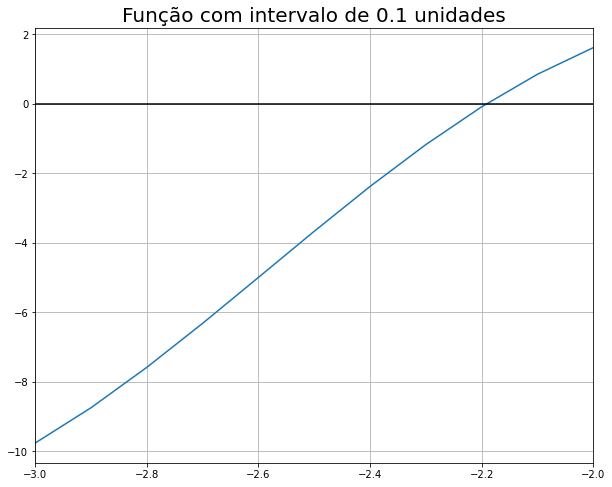

In [42]:
plotar_f(fc, a, b, delta)

In [43]:
t(fc, 0.00001, 200, a, b)

Tempo no método da Bissecção: 3.719329833984375e-05 segundos
Tempo no método de Newton: 0.0003407001495361328 segundos
Melhor tempo: Newton.


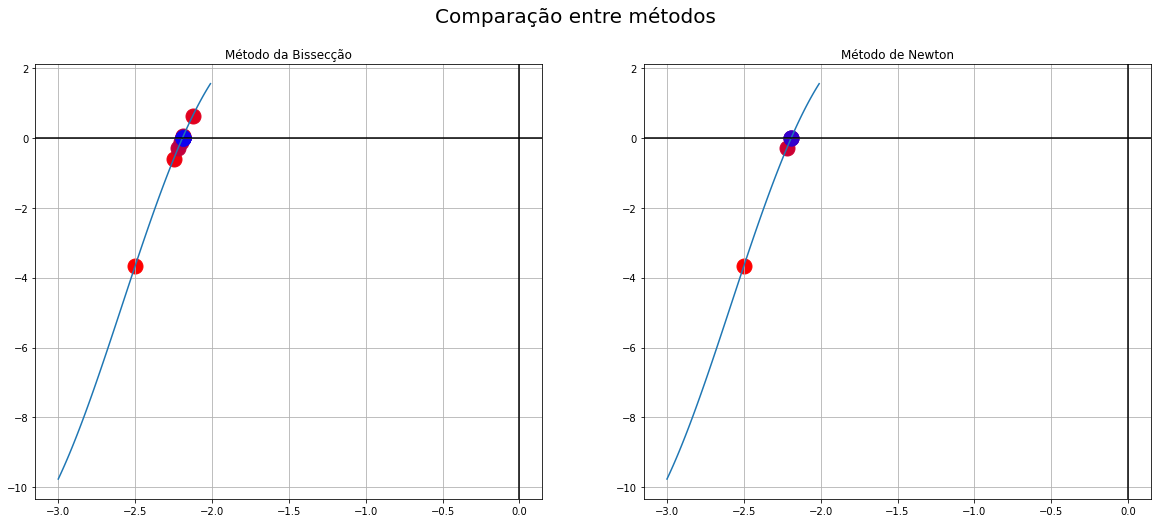

In [44]:
# plotar_pn2(p, p1, a, b, fc)
plotar_pn(fc, a, b, 0.00001, 200, fcLinha)

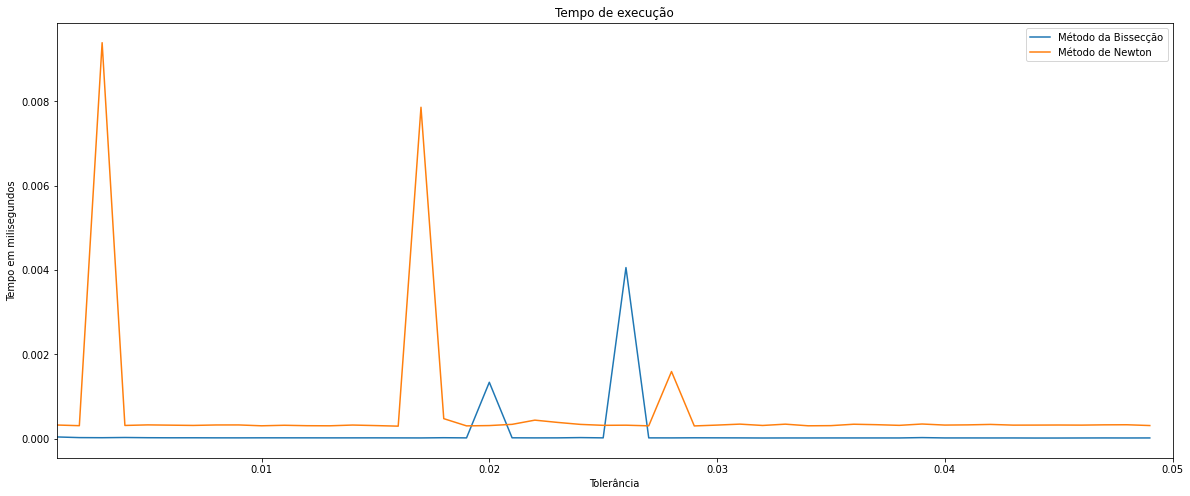

In [45]:
x, tx_biseccao, tx_newton = tolerancia_por_tempo(0.001, 0.05, fc, fcLinha)
plot_tol_tempo(x, tx_biseccao, tx_newton)

## d) $x-0.8-0.2*sen(x)=0$, [0, $\pi /2$]

In [46]:
a, b = 0, math.pi/2
p0 = (a + b)/2
delta = (b - a)/10

In [47]:
def fd(x):
  return x - 0.8 - (0.2*math.sin(x))

In [48]:
def fdLinha(x):
  return 1 - (0.2*math.cos(x))

In [49]:
p = bisseccao(fd, a, b, 0.0004, 100)

Iteração 0: 0.7853981633974483.
Iteração 1: 1.1780972450961724.
Iteração 2: 0.9817477042468103.
Iteração 3: 0.8835729338221293.
Iteração 4: 0.9326603190344698.
Iteração 5: 0.9572040116406401.
Iteração 6: 0.9694758579437253.
Iteração 7: 0.9633399347921827.
Iteração 8: 0.966407896367954.
Iteração 9: 0.9648739155800683.
Iteração 10: 0.9641069251861255.
Iteração 11: 0.9644904203830968.
Raiz encontrada por limite de tolerância!


In [50]:
p1 = newton(fd, fdLinha, p0, 0.00004, 100)

Iteração 1: 0.9671208209237235.
Iteração 2: 0.9643346085485507.
Iteração 3: 0.9643338876952708.
Raiz encontrada por limite de tolerância!


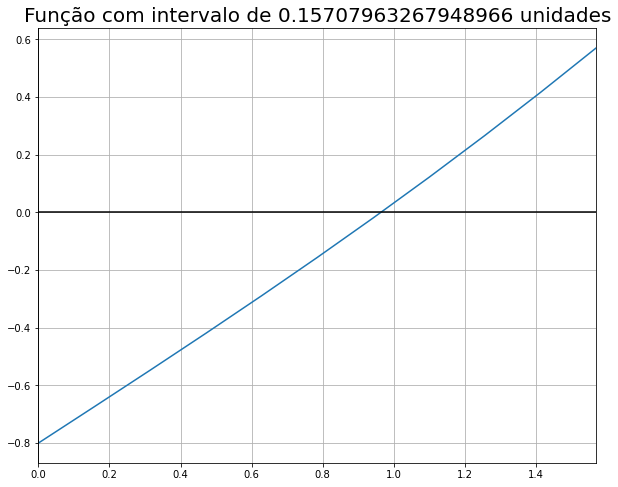

In [51]:
plotar_f(fd, a, b, delta)

In [52]:
t(fd, 0.00001, 200, a, b)

Tempo no método da Bissecção: 4.38690185546875e-05 segundos
Tempo no método de Newton: 0.009713172912597656 segundos
Melhor tempo: Newton.


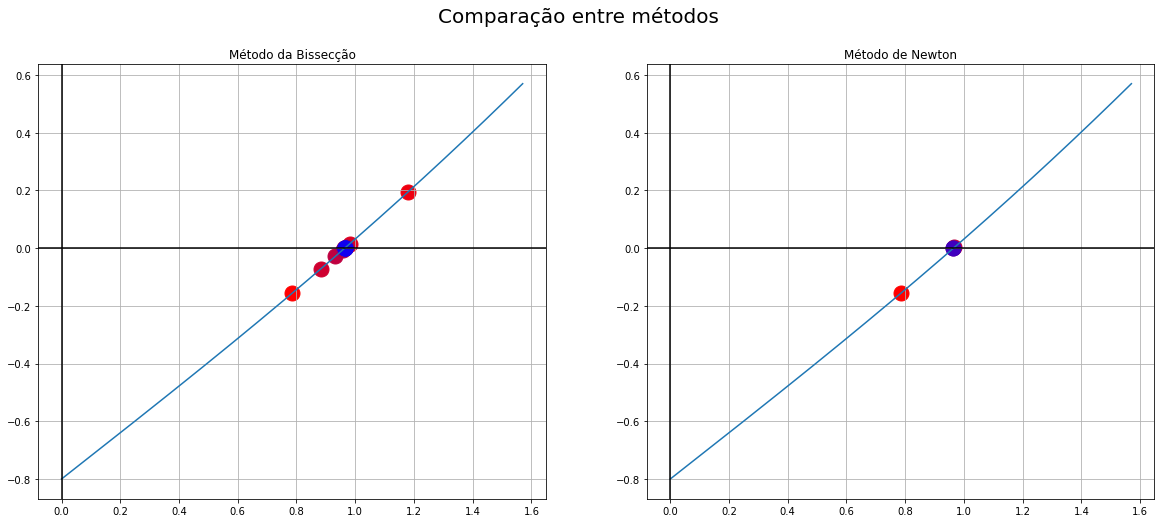

In [53]:
plotar_pn(fd, a, b, 0.00003, 200, fdLinha)

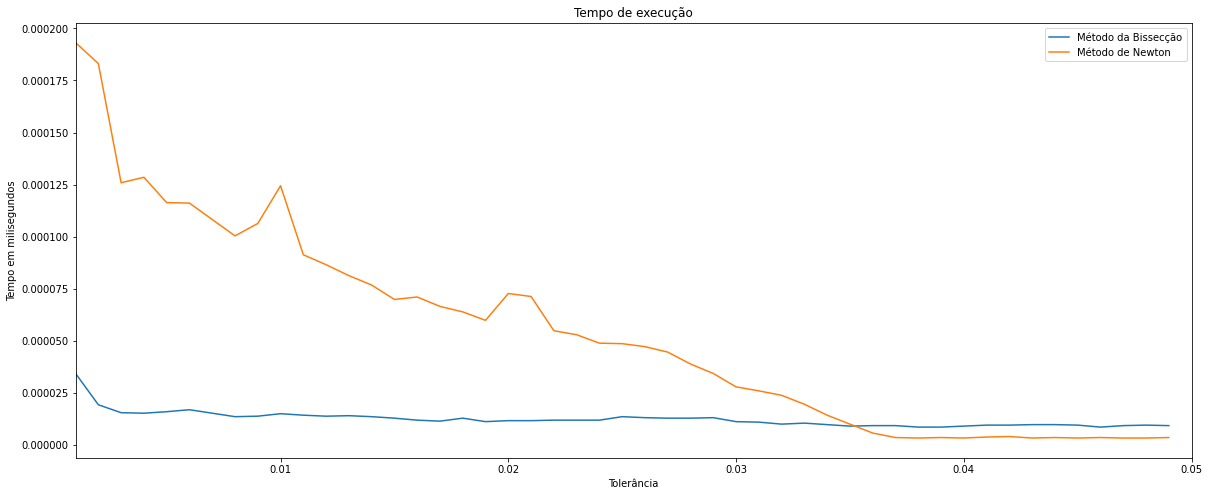

In [73]:
x, tx_biseccao, tx_newton = tolerancia_por_tempo(0.001, 0.05, fd, fdLinha)
plot_tol_tempo(x, tx_biseccao, tx_newton)

## e) Aproxime $\sqrt[3]{25}$

Para que $f(x) = 0$, $x$ precisa ser $\sqrt[3]{25}$, onde $x \in [0,4]$

In [55]:
def fe(x):
  return (25**(1/3)) - x

In [56]:
def feLinha(x):
  return -1

In [57]:
a, b = 0, 4

In [58]:
p = bisseccao(fe, 0, 4, 0.0005, 100)

Iteração 0: 2.0.
Iteração 1: 3.0.
Iteração 2: 2.5.
Iteração 3: 2.75.
Iteração 4: 2.875.
Iteração 5: 2.9375.
Iteração 6: 2.90625.
Iteração 7: 2.921875.
Iteração 8: 2.9296875.
Iteração 9: 2.92578125.
Iteração 10: 2.923828125.
Iteração 11: 2.9248046875.
Iteração 12: 2.92431640625.
Raiz encontrada por limite de tolerância!


In [59]:
p1 = newton(fe, feLinha, 2, 0.00004, 100)

Iteração 1: 2.924017738212866.
Raiz encontrada!


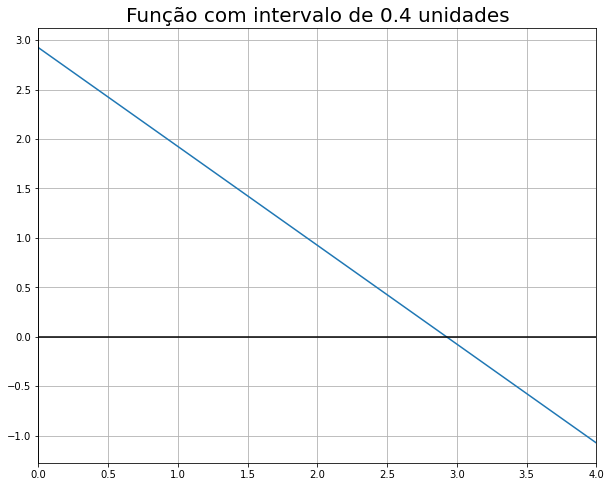

In [60]:
plotar_f(fe, 0, 4, delta = 0.4)

In [61]:
t(fe, 0.00001, 200, a, b)

Tempo no método da Bissecção: 2.9802322387695312e-05 segundos
Tempo no método de Newton: 0.0004239082336425781 segundos
Melhor tempo: Newton.


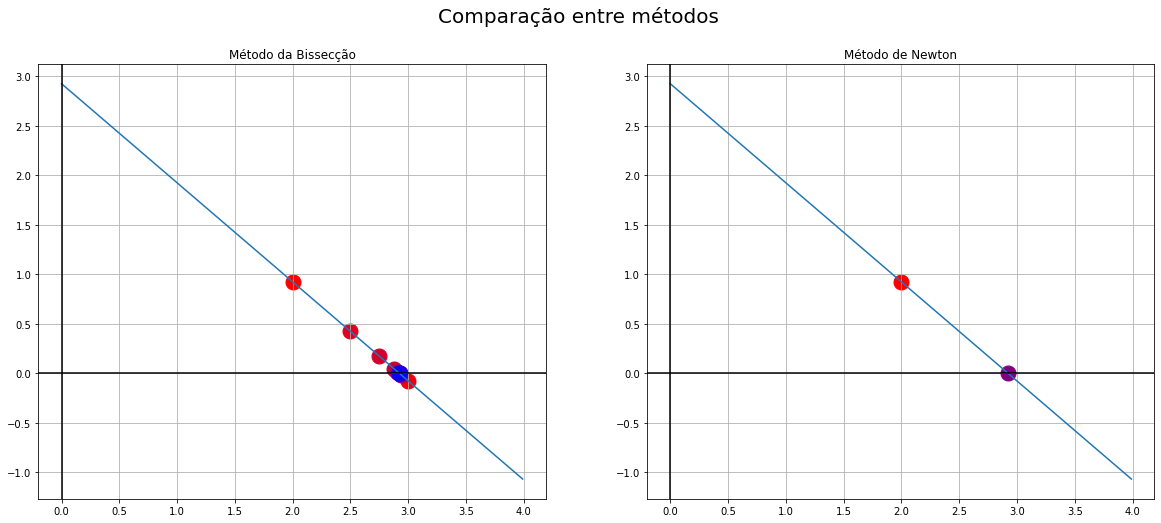

In [62]:
plotar_pn(fe, a, b, 0.00004, 100, feLinha)

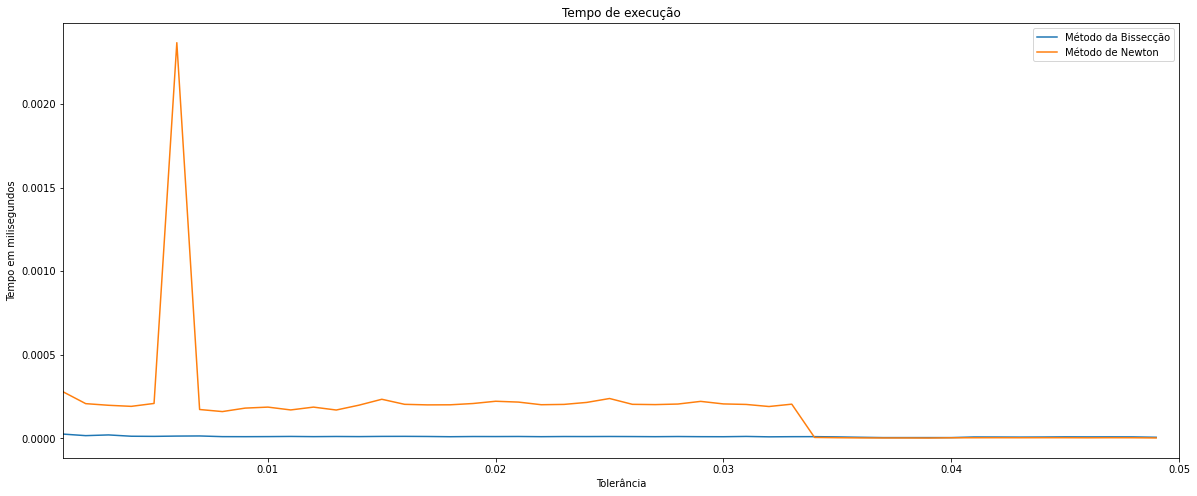

In [77]:
x, tx_biseccao, tx_newton = tolerancia_por_tempo(0.001, 0.05, fe, feLinha)
plot_tol_tempo(x, tx_biseccao, tx_newton)

#7. Adapte o Método de Newton para ser reiniciado com uma semente gerada aleatoriamente (inclusive na primeira tentativa) toda vez que não houver convergência. Experimente nos casos abaixo:

In [64]:
def newton_2(f, fLinha, p0, TOL, N0, prints=True):
  i = 0
  p = []

  while i != N0:
    if fLinha(p0) != 0:
      p.append(p0 - f(p0)/fLinha(p0))
      
    if prints:
      print(f"Iteração {i}: {p[i]}.")

    if f(p[i]) == 0:
      if prints:
        print("Raiz encontrada!")
      return (p, "Raiz encontrada!")


    if abs(p[i]-p0) < TOL:
      if prints:
        print("Raiz encontrada por limite de tolerância!")
      return (p, "Raiz encontrada por limite de tolerância!")

    p0 = p[i]
    i += 1

  if prints:
    print(f"Falha no método de newton após {N0} iterações.")

In [65]:
import random
def reinicio_aleatorio(f, flinha, TOL, N0):
  teste = None
  p0 = random.uniform(1, 500)
  i = 0
  print(f"Início aleatorio com p0 = {p0}")
  while True:
    solucao = newton_2(f, flinha, p0, TOL, N0, prints=False)
    if solucao: 
      raiz = solucao[0][-1]
      print(solucao[1], '\n')
      print(f"Raiz encontrada {raiz}")
      return raiz
    else:
      print("Raiz não encontrada.")
      print("\nGerando um novo p0 aleatorio...")
      p0 = random.uniform(1, 500)
      print(f"p0 = {p0}")

## a) $e^x*sen(x+30)+1=0$

In [66]:
def ga(x):
  return (math.e**x)*(math.sin(x+30))+1

In [67]:
def gaLinha(x):
  return (math.e**x)*( math.sin(x+30) + math.cos(x+30) )

In [68]:
raiz_encontrada = reinicio_aleatorio(ga, gaLinha, 0.00001, 100)

Início aleatorio com p0 = 176.89667703128805
Raiz encontrada por limite de tolerância! 

Raiz encontrada 177.34511513692635


## b) $cos(x)-2^{x-10}=-2$

In [69]:
def gb(x):
  return math.cos(x) - (2**(x-10)) + 2

In [70]:
def gbLinha(x):
  return (-2**(x-10))*(math.log(2)) - math.sin(x)

In [71]:
raiz_encontrada = reinicio_aleatorio(gb, gbLinha, 0.00001, 100)

Início aleatorio com p0 = 474.2745648201034
Raiz não encontrada.

Gerando um novo p0 aleatorio...
p0 = 173.65688104396912
Raiz não encontrada.

Gerando um novo p0 aleatorio...
p0 = 262.19288510001104
Raiz não encontrada.

Gerando um novo p0 aleatorio...
p0 = 178.46673723795885
Raiz não encontrada.

Gerando um novo p0 aleatorio...
p0 = 378.8830644112922
Raiz não encontrada.

Gerando um novo p0 aleatorio...
p0 = 139.62253586503252
Raiz encontrada por limite de tolerância! 

Raiz encontrada 11.011296044683343
